In [1]:
import pandas as pd

df = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

# EDA

In [2]:
df.shape

(7321633, 20)

In [3]:
df.head(10)

,eventTimestamp,unitDisplayType,brandName,bundleId,appVersion,correctModelName,countryCode,deviceId,osAndVersion,connectionType,c1,c2,c3,c4,size,mediationProviderVersion,bidFloorPrice,sentPrice,winBid,has_won
0,1656411567773,banner,LG,com.tilegarden.match3,1.8.22,LM-V405,US,74f9b473fad,Android-10.0,3G,cb2,6.0,6b,4.0,320x50,11.2.1,0.01,0.02,0.88,0
1,1656925395488,banner,Generic,com.loop.match3d,1245.34.0,Android 4.0,FR,6ad4c88b84e,Android-4.0,WIFI,7d3,6.0,6b,6.0,320x50,11.4.2,0.01,0.03,0.08,0
2,1656913751642,banner,Generic,com.loop.match3d,1245.35.0,Android 4.0,US,743b9849642,Android-4.0,WIFI,7d3,3.0,6b,3.0,320x50,11.4.3,0.01,0.02,1.72,0
3,1656656319103,banner,Generic,com.loop.match3d,1245.34.0,Android 4.0,GB,6ad933115b2,Android-4.0,WIFI,7d3,3.0,6b,5.0,320x50,11.4.2,0.01,0.06,0.21,0
4,1657429389462,interstitial,OPPO,com.loop.match3d,1245.35.0,CPH2127,ID,809f9785bb3,Android-11.0,WIFI,8bd,3.0,6b,3.0,320x480,11.4.3,0.01,0.16,1.91,0
5,1656733933530,banner,Motorola,com.loop.match3d,1245.35.0,One 5G UW,US,744b742a55a,Android-11.0,WIFI,7d3,6.0,6b,8.0,320x50,11.4.3,0.01,0.02,1.90,0
6,1656764469359,banner,AT&T,com.tilegarden.match3,1.7.83,V350U,US,74c69ddbf47,Android-10.0,3G,cb2,9.0,6b,5.0,320x50,11.1.1,0.01,0.13,1.47,0
7,1657304610451,banner,Samsung,com.loop.match3d,1245.35.0,SM-T227U,US,74c110245b1,Android-11.0,3G,7d3,7.0,6b,2.0,728x90,11.4.3,0.01,0.03,2.10,0
8,1656878804685,banner,Samsung,com.tintash.nailsalon,1.3.6,SM-A032M,BR,80155787fb4,Android-11.0,WIFI,ad3,3.0,6b,8.0,320x50,11.3.3,0.01,0.02,0.14,0
9,1656535501552,banner,Apple,1502447854,1245.34.0,iPhone,RU,74d720f8fb3,iOS-14.4.2,WIFI,59b,9.0,79,9.0,320x50,11.4.1,0.01,0.02,0.20,0


In [4]:
df.dtypes

eventTimestamp                int64
unitDisplayType              object
brandName                    object
bundleId                     object
appVersion                   object
correctModelName             object
countryCode                  object
deviceId                     object
osAndVersion                 object
connectionType               object
c1                           object
c2                          float64
c3                           object
c4                          float64
size                         object
mediationProviderVersion     object
bidFloorPrice               float64
sentPrice                   float64
winBid                      float64
has_won                       int64
dtype: object

In [5]:
nums = df.select_dtypes(exclude=['object']).columns.tolist()
strings = df.select_dtypes(include=['object']).columns.tolist()

## Numerical values

array([[<Axes: title={'center': 'eventTimestamp'}>,
        <Axes: title={'center': 'c2'}>, <Axes: title={'center': 'c4'}>],
       [<Axes: title={'center': 'bidFloorPrice'}>,
        <Axes: title={'center': 'sentPrice'}>,
        <Axes: title={'center': 'winBid'}>],
       [<Axes: title={'center': 'has_won'}>, <Axes: >, <Axes: >]],
      dtype=object)

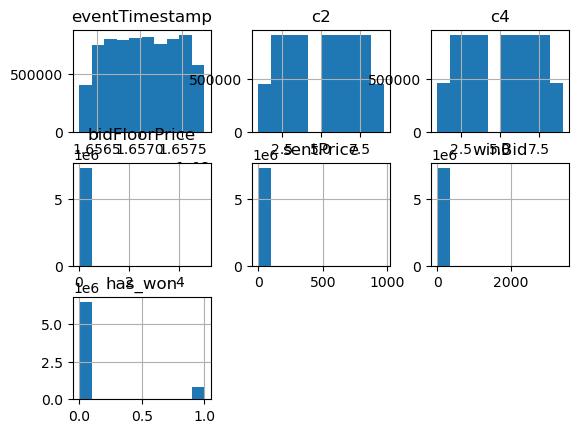

In [6]:
df[nums].hist()

In [7]:
pd.options.display.float_format = '{:.4f}'.format

df[nums].describe()

,eventTimestamp,c2,c4,bidFloorPrice,sentPrice,winBid,has_won
count,7321633.0000,7321633.0000,7321633.0000,7321633.0000,7321633.0000,7321633.0000,7321633.0000
mean,1657044524161.0886,5.0006,4.9990,0.0175,0.5810,4.1846,0.1110
std,396424337.5184,2.3444,2.3453,0.1317,3.8075,20.6945,0.3141
min,1656290100421.0000,1.0000,1.0000,0.0100,0.0100,0.0100,0.0000
25%,1656710203520.0000,3.0000,3.0000,0.0100,0.0200,0.0900,0.0000
50%,1657043290386.0000,5.0000,5.0000,0.0100,0.0400,0.5100,0.0000
75%,1657388278715.0000,7.0000,7.0000,0.0100,0.1700,1.5400,0.0000
max,1657758896986.0000,9.0000,9.0000,5.0000,970.4100,3405.7200,1.0000


<Axes: >

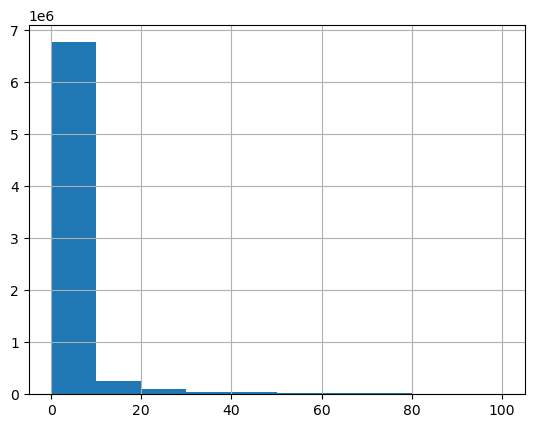

In [8]:
df[df.winBid < 100].winBid.hist()

<Axes: >

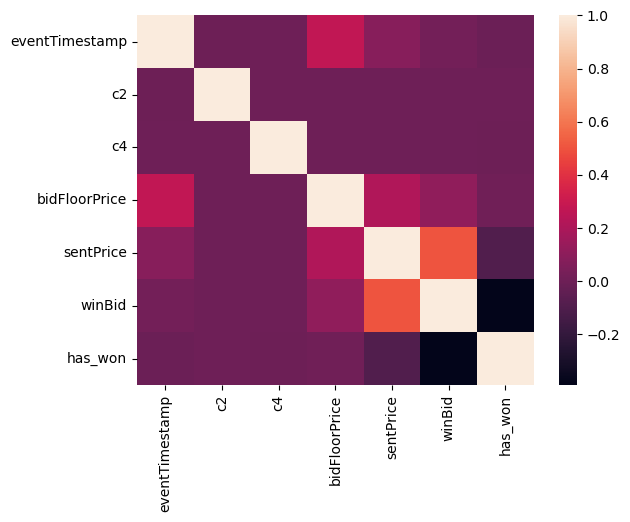

In [9]:
import seaborn as sns

df_corr = df[nums].corr(method='spearman')
sns.heatmap(df_corr)

## Categorical/Ordinal values

In [10]:
df[strings].nunique()

unitDisplayType                 3
brandName                     144
bundleId                       18
appVersion                    101
correctModelName             2568
countryCode                   168
deviceId                    40176
osAndVersion                   96
connectionType                  3
c1                             50
c3                              4
size                            6
mediationProviderVersion       35
dtype: int64

In [11]:
df.isna().sum()

eventTimestamp                0
unitDisplayType               0
brandName                     0
bundleId                      0
appVersion                    0
correctModelName              0
countryCode                  27
deviceId                      0
osAndVersion                  0
connectionType              666
c1                            0
c2                            0
c3                            0
c4                            0
size                          0
mediationProviderVersion      0
bidFloorPrice                 0
sentPrice                     0
winBid                        0
has_won                       0
dtype: int64

In [12]:
df.connectionType.value_counts()

connectionType
WIFI       5844929
3G         1168337
UNKNOWN     307701
Name: count, dtype: int64

# Data Prep/Feature Engineering

In [13]:
# Seems like a small number of missing values relative to the dataset size. Opting to simply drop.

df.dropna(axis=0, how='any', subset=['countryCode', 'connectionType'], inplace=True)

In [14]:
# EDA shows that the target contains some extreme values - opting to filter out. 

import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df['winBid']))
df_filtered = df[z_scores < 2]
df_filtered.describe()

,eventTimestamp,c2,c4,bidFloorPrice,sentPrice,winBid,has_won
count,7189001.0000,7189001.0000,7189001.0000,7189001.0000,7189001.0000,7189001.0000,7189001.0000
mean,1657043963666.0503,5.0005,4.9990,0.0165,0.3950,2.1784,0.1129
std,396259853.8961,2.3443,2.3453,0.1091,1.4075,5.2725,0.3164
min,1656290100421.0000,1.0000,1.0000,0.0100,0.0100,0.0100,0.0000
25%,1656709754571.0000,3.0000,3.0000,0.0100,0.0200,0.0900,0.0000
50%,1657042523889.0000,5.0000,5.0000,0.0100,0.0400,0.5000,0.0000
75%,1657387501742.0000,7.0000,7.0000,0.0100,0.1700,1.4400,0.0000
max,1657758896986.0000,9.0000,9.0000,5.0000,45.5100,45.5700,1.0000


<Axes: >

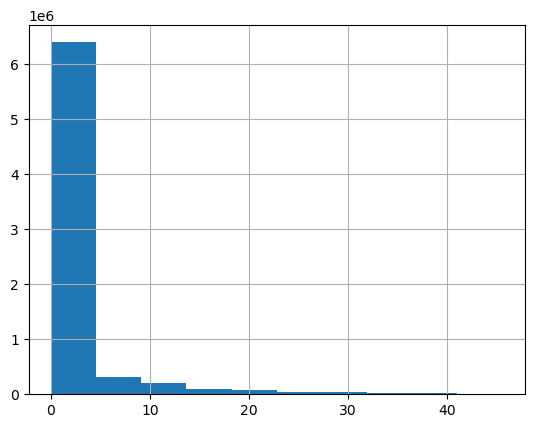

In [15]:
df_filtered.winBid.hist()

In [16]:
# Use random subsample for initial training and tuning.

df_sample = df_filtered.sample(frac=0.15, axis=0, random_state=1)

In [17]:
# Define feature transformation steps for pipeline.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

X = df_sample.drop(axis=1, columns=['winBid', 'has_won'])
y = df_sample.winBid

nums = X.select_dtypes(exclude=['object']).columns.tolist()
strings = X.select_dtypes(include=['object']).columns.tolist()

preproc = ColumnTransformer([('scaler', StandardScaler(), nums),
                             ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), strings)])

# Modeling

## Baseline Model

In [18]:
# Baseline simple decision tree against XGBoost

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipeline = Pipeline([('preproc', preproc), ('tree', DecisionTreeRegressor(random_state=1))])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

3.5373320125426138

## XGB Regressor

In [19]:
# Use RandomizedSearchCV for initial model tuning

from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_score = make_scorer(rmse, greater_is_better=False)

param_grid = {'xgb_reg__learning_rate': [0.15, 0.2, 0.25],
              'xgb_reg__max_depth': [7, 8, 9, 10],
              'xgb_reg__n_estimators': [1250, 1500, 1750]}

pipeline = Pipeline([('preproc', preproc), ('xgb_reg', XGBRegressor())])

rs = RandomizedSearchCV(pipeline, param_grid, cv=3, scoring=rmse_score, n_jobs=12, 
                          error_score='raise', random_state=1, verbose=1)
rs.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('preproc',
                                              ColumnTransformer(transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               ['eventTimestamp',
                                                                                'c2',
                                                                                'c4',
                                                                                'bidFloorPrice',
                                                                                'sentPrice']),
                                                                              ('encoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['unitDisplayType',
                                                                                'brandName',
                                                                                'bundleId',
                                                                                'appVersion',
                                                                                'correctModelName'...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_jobs=12,
                   param_distributions={'xgb_reg__learning_rate': [0.15, 0.2,
                                                                   0.25],
                                        'xgb_reg__max_depth': [7, 8, 9, 10],
                                        'xgb_reg__n_estimators': [1250, 1500,
                                                                  1750]},
                   random_state=1,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [20]:
rs.best_score_

-2.4730251814321806

In [21]:
rs.best_params_

{'xgb_reg__n_estimators': 1750,
 'xgb_reg__max_depth': 8,
 'xgb_reg__learning_rate': 0.2}

In [22]:
rs.cv_results_

{'mean_fit_time': array([178.63508693, 222.72760566, 182.15564418, 159.03732872,
        145.51460369, 149.07918914, 157.09936937, 197.54034797,
        141.34392532, 125.86708013]),
 'std_fit_time': array([0.72749027, 0.38759873, 0.86143047, 0.89183123, 0.87555071,
        0.62772571, 0.65968664, 1.59575952, 0.95725129, 1.13583787]),
 'mean_score_time': array([ 48.84946775, 122.78559391,  40.28400946,  31.56012781,
         64.80184293,  46.17347956,  75.05698999,  39.67850161,
         20.83050664,  18.9559412 ]),
 'std_score_time': array([0.23772376, 1.38393389, 0.28903091, 1.66021137, 0.45186621,
        0.5958083 , 0.73935325, 0.87382364, 0.06166756, 0.33930971]),
 'param_xgb_reg__n_estimators': masked_array(data=[1250, 1500, 1500, 1250, 1500, 1750, 1250, 1750, 1750,
                    1750],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_xgb_reg__max_depth'

# Final Model

In [25]:
from sklearn.model_selection import cross_validate

X = df_filtered.drop(axis=1, columns=['winBid', 'has_won'])
y = df_filtered.winBid

pipeline = Pipeline([('preproc', preproc), ('xgb_reg', XGBRegressor(n_estimators=1750, max_depth=8, learning_rate=0.2))])

scores = cross_validate(pipeline, X, y, cv=5, scoring=rmse_score, return_train_score=True)
scores

{'fit_time': array([200.75507092, 203.33288455, 219.04195619, 216.74980474,
        220.14224434]),
 'score_time': array([ 9.88171291, 10.16349649, 10.02785325, 10.11803889, 10.0070045 ]),
 'test_score': array([-2.05173029, -2.03867699, -2.04191265, -2.02351027, -2.05390309]),
 'train_score': array([-1.71444541, -1.7196388 , -1.71774938, -1.71906365, -1.72385066])}

In [26]:
pipeline.fit(X, y)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['eventTimestamp', 'c2', 'c4',
                                                   'bidFloorPrice',
                                                   'sentPrice']),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['unitDisplayType',
                                                   'brandName', 'bundleId',
                                                   'appVersion',
                                                   'correctModelName',
                                                   'countryCode', 'deviceId',
                                                   'osAndVersion',
                                                   'connectionTy...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1750, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

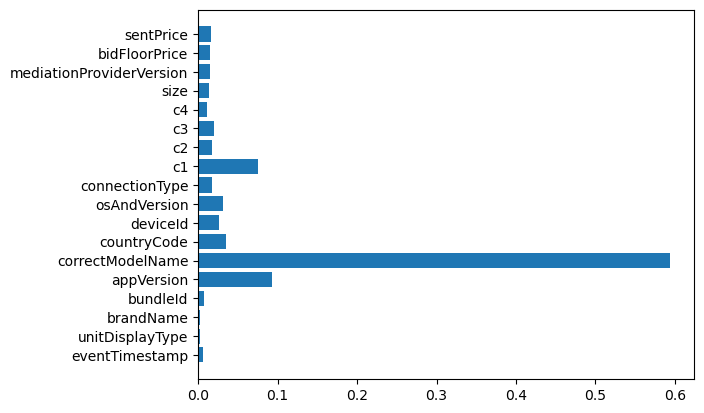

In [29]:
# Plot feature importances

import matplotlib.pyplot as plt

model = pipeline.named_steps['xgb_reg']
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.show()

# Predictions

In [30]:
df_test.head(10)

,eventTimestamp,unitDisplayType,brandName,bundleId,appVersion,correctModelName,countryCode,deviceId,osAndVersion,connectionType,c1,c2,c3,c4,size,mediationProviderVersion,bidFloorPrice,sentPrice
0,1657758857892,rewarded,Generic,com.loop.match3d,1245.35.0,Android 4 Tablet,US,6a0a94554cf,Android-4.0,3G,7b8,2.0000,6b,2.0000,768x1024,11.4.3,0.0500,0.0600
1,1657210707978,interstitial,Generic,com.loop.match3d,1245.35.0,Android 4.0,ZA,6a0b0e59f45,Android-4.0,WIFI,8bd,8.0000,6b,6.0000,320x480,11.4.3,0.0100,0.1600
2,1657392939412,interstitial,Motorola,com.YayySAL.DodgeAgent,13.0.02,Moto g(8) power lite,BR,6a0fa820c46,Android-10.0,WIFI,ea0,8.0000,6b,9.0000,320x480,11.0.0,0.0500,0.0600
3,1657386816882,interstitial,Huawei,com.tintash.nailsalon,1.3.6,JDN2-AL00HN,IQ,6a142bdbea2,Android-9.0,WIFI,3dc,6.0000,6b,4.0000,768x1024,11.3.3,0.0100,0.0500
4,1657211600823,banner,Generic,com.tilegarden.match3,1.8.52,Android 4.0,US,6a16943a771,Android-4.0,WIFI,cb2,7.0000,6b,5.0000,320x50,11.4.3,0.0100,0.0300
5,1657681515882,rewarded,Xiaomi,com.loop.match3d,1245.35.0,M2102J20SG,CL,6a16f51a055,Android-11.0,WIFI,7b8,2.0000,6b,7.0000,320x480,11.4.3,0.0500,0.2400
6,1656831532490,banner,Motorola,com.loop.match3d,1245.34.0,Moto E6 Play,MX,6a17ec40fd7,Android-9.0,WIFI,7d3,6.0000,6b,3.0000,320x50,11.4.2,0.0100,0.0200
7,1657682026847,banner,Xiaomi,com.kamilbilge.ropesavior3d,1.5.9,Redmi Note 8 Pro,ID,6a1ce05586c,Android-10.0,WIFI,c17,2.0000,6b,9.0000,320x50,11.3.3,0.0500,0.0700
8,1656819719972,interstitial,Apple,1529614832,1.8.50,iPhone,VN,6a22a17837d,iOS-15.5,WIFI,313,1.0000,4b,8.0000,320x480,11.4.1,0.0100,0.0200
9,1657001527931,banner,Generic,com.tintash.nailsalon,1.3.6,Android 4.0,SV,6a3302f26de,Android-4.0,WIFI,ad3,4.0000,6b,7.0000,320x50,11.3.3,0.0100,0.0400


In [31]:
y_pred = pipeline.predict(df_test)

In [37]:
df_test['winBid'] = y_pred
df_out = df_test[['deviceId', 'winBid']]
df_out

,deviceId,winBid
0,6a0a94554cf,16.1308
1,6a0b0e59f45,0.2811
2,6a0fa820c46,3.9813
3,6a142bdbea2,2.0265
4,6a16943a771,1.2519
...,...,...
41581,80efe531afc,13.3321
41582,80f02dd397f,1.3874
41583,80f2d20f885,1.4823
41584,80f3adf4abf,15.3969


In [39]:
df_out.to_csv('test_predictions_pawel_dobrowolski.csv', index=False)